In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf

In [18]:
bac_yf = yf.download('BAC', start = '2010-01-05', end = '2024-01-22', progress=False)

bac_rnd = pd.read_csv('data/bac_3.csv')
bac_rnd['Date'] =pd.to_datetime(bac_rnd['idt'], format='%m/%d/%y')
bac_rnd = bac_rnd.set_index('Date')
bac_rnd.drop('idt',axis= 1, inplace=True)

bac_rnd['dec_plus_inc'] = bac_rnd['prDec'] + bac_rnd['prInc']
bac_rnd['dec_minus_inc'] = bac_rnd['prDec'] - bac_rnd['prInc']

In [19]:
full_df = bac_rnd.merge(bac_yf, how = 'left', left_index=True, right_index=True)
full_df

,market,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,...,lg_change_incr,prInc,dec_plus_inc,dec_minus_inc,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-15,bac,3,-0.02514,0.18210,-0.38173,0.85192,-0.25389,-0.01634,0.19272,-20,...,20,0.09307,0.24205,0.05591,16.639999,16.650000,16.230000,16.260000,13.231727,195117100.0
2010-01-29,bac,3,-0.02194,0.21265,-0.79513,1.61552,-0.28826,0.00001,0.21786,-20,...,20,0.12009,0.28759,0.04741,15.490000,15.550000,15.090000,15.180000,12.352864,175135300.0
2010-02-12,bac,3,-0.01699,0.21625,-0.86181,1.83248,-0.28670,0.00720,0.22358,-20,...,20,0.12713,0.29117,0.03691,14.470000,14.540000,14.280000,14.450000,11.758820,162819300.0
2010-02-26,bac,3,-0.00965,0.17893,-0.70108,1.40641,-0.23570,0.00776,0.19373,-20,...,20,0.09233,0.22115,0.03649,16.570000,16.840000,16.410000,16.660000,13.557224,343669400.0
2010-03-15,bac,3,0.00006,0.17357,-0.71889,1.63480,-0.21657,0.01649,0.19608,-20,...,20,0.09545,0.20870,0.01780,16.740000,16.910000,16.590000,16.850000,13.720177,120308200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13,bac,3,0.00352,0.11858,-0.55862,1.13971,-0.14633,0.01278,0.14065,-20,...,20,0.03384,0.08831,0.02063,30.750000,32.130001,30.629999,32.040001,32.040001,60311100.0
2023-12-20,bac,3,0.00081,0.12808,-0.29318,0.71192,-0.16021,0.00599,0.15502,-20,...,20,0.05067,0.11391,0.01257,33.380001,33.709999,32.950001,32.980000,32.980000,44711400.0
2023-12-27,bac,3,0.00169,0.12350,-0.40609,0.92177,-0.15376,0.00863,0.14759,-20,...,20,0.04262,0.10108,0.01584,33.799999,33.950001,33.660000,33.840000,33.840000,24498600.0


[]

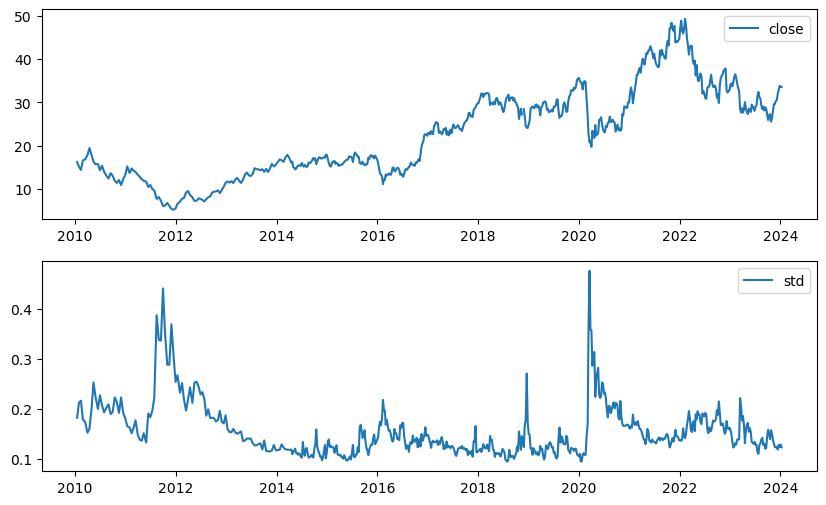

In [42]:
fig, axes = plt.subplots(2,1,figsize=(10, 6))

axes[0].plot(full_df.index,full_df['Close'], label = 'close')
axes[1].plot(full_df.index,full_df['sd'], label = 'std')

axes[0].legend()
axes[1].legend()
plt.plot()